In [1]:
import numpy as np
import torch

# Initialization

<center>
    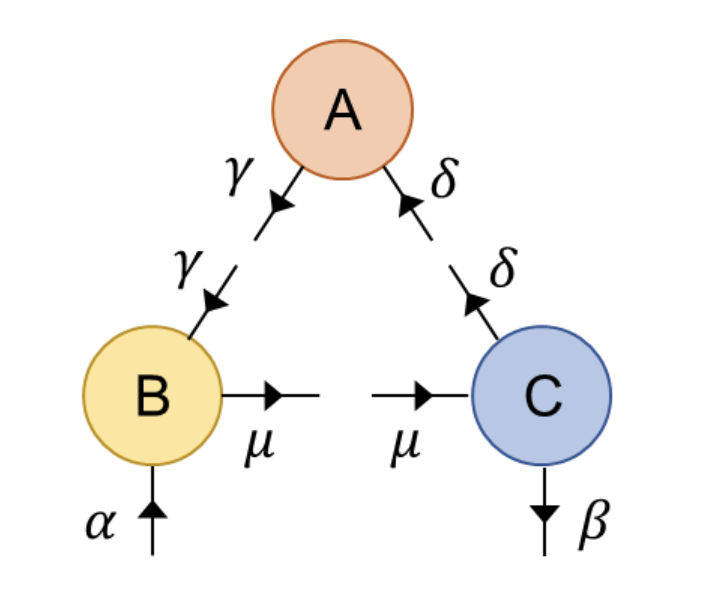
</center>

In [2]:
α=10; β=12; γ=14; μ=20; δ=17;

A=torch.rand(γ,δ); B=torch.rand(α,γ,μ); C=torch.rand(β,μ,δ)

In [3]:
from timeit import default_timer as timer

# Contracting B and C via index μ

<center>
    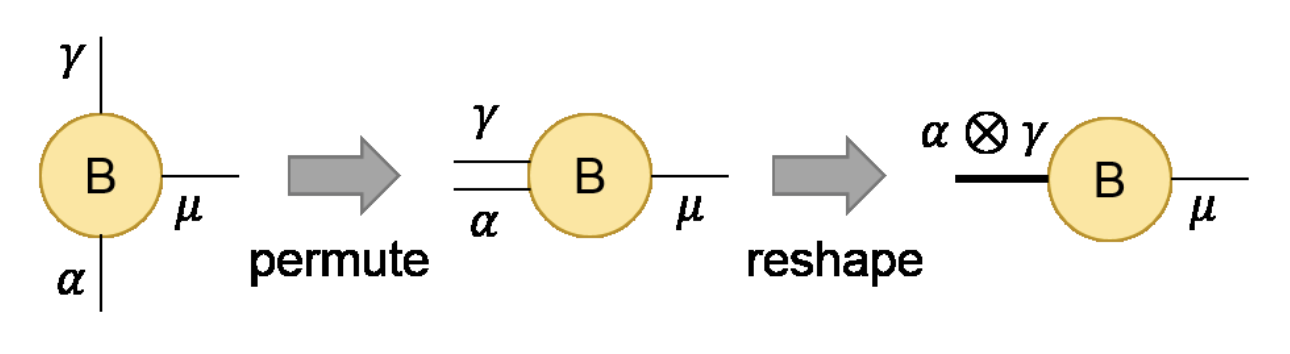
</center>

In [4]:
start = timer()
BC = (B.reshape(α*γ,μ) @ C.permute(1,0,2).reshape(μ,β*δ)).reshape(α,γ,β,δ)

<center>
    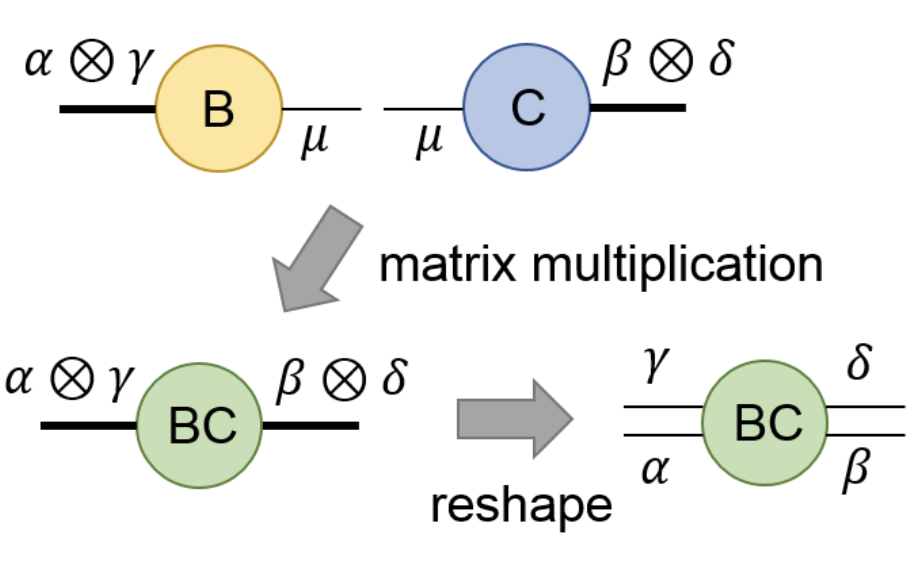
</center>

# Contracting BC and A via γ and δ

<center>
    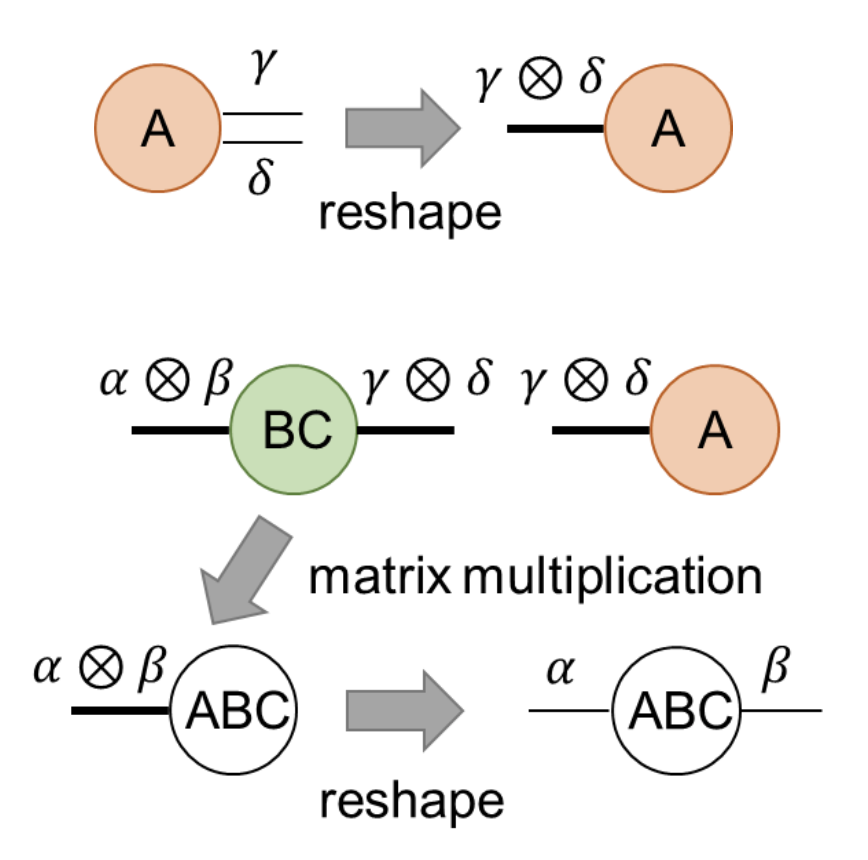
</center>

In [5]:
R1 = (A.reshape(1,γ*δ) @ BC.permute(1,3,0,2).reshape(γ*δ,α*β)).reshape(α,β)

In [6]:
print(f'Time: {timer() - start}')

Time: 0.009345334000000038


# Brute force matrix multiplication

In [7]:
def brute_force(A,B,C):
    α,γ,μ = B.shape;
    β,_,δ = C.shape
    R = torch.zeros(α,β)
    for αᵢ in range(α):
        for βᵢ in range(β):
            for γᵢ in range(γ):
                for μᵢ in range(μ):
                    for δᵢ in range(δ):
                        R[αᵢ,βᵢ] += A[γᵢ,δᵢ] * B[αᵢ,γᵢ,μᵢ] * C[βᵢ,μᵢ,δᵢ]
    return R

In [8]:
start = timer()
R2 = brute_force(A,B,C)
print(f'Time: {timer() - start}')

Time: 9.361184787000001


In [9]:
assert R2.isclose(R1).all(), 'Matrices are not the same'

# Exercise

In [16]:
AC = (A @ C.permute(2,0,1).reshape(δ,β*μ)).reshape(γ,β,μ)

In [23]:
start = timer()
R3 = B.reshape(α,γ*μ) @ AC.permute(0,2,1).reshape(γ*μ,β)
print(f'Time: {timer() - start}')

Time: 0.0006165140000575775


In [20]:
assert R3.isclose(R1).all(), 'Matrices are not the same'

In [27]:
print(f'Relative performance gain: {0.009345334000000038 / 0.0006165140000575775}') 

Relative performance gain: 15.158348389699599
